# Task # 2 - To Explore  Supervised Machine Learning

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
info = "http://bit.ly/w-data"
data = pd.read_csv(info)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# summarizing dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


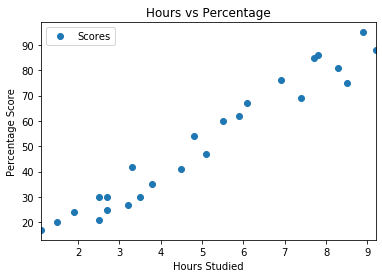

In [4]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
### Preparing the data The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)  #train:test ratio 70:30

### Training the Algorithm

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


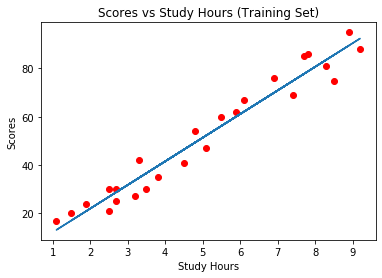

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'Red')
plt.plot(X, line);

plt.title('Scores vs Study Hours (Training Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

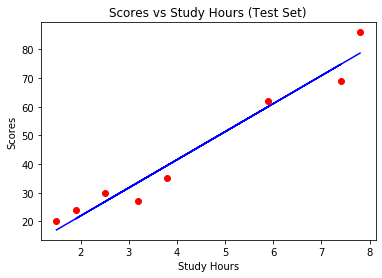

In [9]:
#Visualizing the Test Set Result

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'Blue')
plt.title('Scores vs Study Hours (Test Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

In [10]:
# evaluating regression model
from sklearn import metrics   
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [11]:
# creating a interactive user interface
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(Hours):
    a=regressor.predict([[Hours]])
    print("Predicted score",round(a[0],2))
    return 
interact(f, Hours=widgets.FloatSlider(min=0, max=10, step=0.1,value=5))

interactive(children=(FloatSlider(value=5.0, description='Hours', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.f(Hours)>

In [12]:
#Predict Score if student study for 9.5 hrs in a day

predicted_score = regressor.predict([[9.5]])
print(predicted_score)

[95.36219891]


## Rashmi Dubey